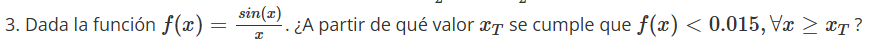

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from matplotlib.animation import FuncAnimation, PillowWriter

# Definición de la función
def f(x):
    return np.sinc(x / np.pi)  # sinc(x) = sin(x)/x

# Intervalo de evaluación
x_vals = np.linspace(1, 100, 10000)
y_vals = f(x_vals)

# Buscar x_T donde f(x) < 0.015 y se mantiene así
x_T = None
for i, y in enumerate(y_vals):
    if y < 0.015 and np.all(y_vals[i:] < 0.015):
        x_T = x_vals[i]
        break

# Configuración de la figura
fig, ax = plt.subplots(figsize=(12, 8))
line, = ax.plot([], [], label=r'$f(x) = \frac{\sin(x)}{x}$', color='blue')
ax.axhline(0.015, color='red', linestyle='--', label='y = 0.015')
vertical_line, = ax.plot([], [], color='green', linestyle='--')
point_T, = ax.plot([], [], 'go', label=f'x_T ≈ {x_T:.4f}')
ax.set_xlim(1, 100)
ax.set_ylim(-0.2, 0.2)
ax.set_title('f(x) = sin(x)/x y el valor x_T')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

# Función de animación
def update(frame):
    line.set_data(x_vals[:frame], y_vals[:frame])
    if x_vals[frame] >= x_T:
        vertical_line.set_data([x_T, x_T], [0, f(x_T)])
        point_T.set_data([x_T], [f(x_T)])
    return line, vertical_line, point_T

# Crear animación
ani = FuncAnimation(fig, update, frames=len(x_vals), interval=1, blit=True)

# Guardar como GIF
ani.save('funcion_x_T.gif', writer=PillowWriter(fps=60))
